In [1]:
import numpy as np
from numpy import vectorize

import matplotlib.pyplot as plt
%matplotlib inline

from theta import rtbm, minimizer
from theta.costfunctions import logarithmic

## Generate data

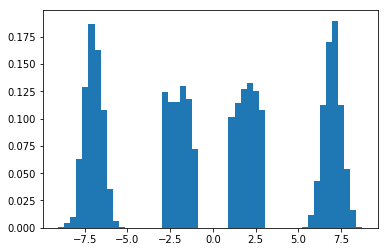

In [2]:
# likas 1d example uniform
n = 5000

data = np.random.uniform(-5,5,n)
data = data.reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

In [ ]:
# likas 1d example
n = 5000

data = np.zeros(n)
u = np.random.random_sample(n)
for i in range(n):
    if u[i] < 0.25:
        data[i] = np.random.normal(-7, 0.5)
    elif u[i] < 0.50:
        data[i] = np.random.uniform(-3,-1)
    elif u[i] < 0.75:
        data[i] = np.random.uniform(1,3)
    else:
        data[i] = np.random.normal(7, 0.5)
data = data.reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

In [ ]:
# likas 1d example 2
def p(x):
    a = 1/6.5523
    if x < 0 and x >= 3 + 2**0.5:
        return 0
    elif 0 <= x < 2:
        return a*(2-x/2)
    else:
        return a*(2-(x-3)**2)

def rejection_sampler(p,xbounds,pmax):
    while True:
        x = np.random.rand(1)*(xbounds[1]-xbounds[0])+xbounds[0]
        y = np.random.rand(1)*pmax
        if y <= p(x):
            return x

n = 5000
data = np.zeros(n)
for i in range(n):
    data[i] = rejection_sampler(p,[0,3+2**0.5],0.3)
data = data.reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

In [ ]:
# likas example 3, 2d uniform [0,0.2]
n = 5000
data = np.random.uniform(0,0.2,(2,n/2))
plt.figure(figsize=(5,5))
plt.hist2d(data[0,:], data[1,:], bins=50, normed=True);

## Training

In [ ]:
a = rtbm.RTBM(1,2, init_max_param_bound=20)

In [ ]:
minim = minimizer.CMA(False)
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

## Testing output

In [ ]:
test_data = (np.linspace(-10,10, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Testing model

In [32]:
mdl = Model()
mdl.add(ThetaUnitLayer(1,2,Nhidden=1, init_max_param_bound=20))
mdl.add(NormAddLayer(2,1))

In [33]:
from theta.layers import ThetaUnitLayer, NormAddLayer
from theta.model import Model

CMA on 1 cpu(s) enabled
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=231979, Fri Dec  1 07:44:48 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 2.722408485005778e+04 1.0e+00 1.91e+00  2e+00  2e+00 0:00.1
    2     22 4.045596485119459e+04 1.2e+00 1.83e+00  2e+00  2e+00 0:01.7
    3     33 3.107167935551463e+04 1.2e+00 1.76e+00  2e+00  2e+00 0:03.3
    5     55 3.623893155844053e+04 1.3e+00 1.59e+00  1e+00  2e+00 0:06.5
    8     88 4.526887957560168e+04 1.4e+00 1.36e+00  1e+00  1e+00 0:11.2
   12    132 3.302683735920493e+04 1.6e+00 1.29e+00  1e+00  1e+00 0:17.5
   16    176 3.905656808517052e+04 1.7e+00 9.58e-01  8e-01  1e+00 0:23.8
   21    231 1.956430958571550e+04 1.8e+00 7.69e-01  6e-01  8e-01 0:31.6
   27    297 2.606149990304835e+04 2.1e+00 7.18e-01  6e-01  8e-01 0:41.1
   33    363 3.044697087150353e+04 2.6e+00 7.75e-01  6e-01  9e-01 0:50.5
   40    440 2.603044893453329e+04 3.2e+00 8.45e-01  6e-01  9e-01 1:01.5
   48    

/usr/local/lib/python2.7/dist-packages/RTBM-0.0.1-py2.7-linux-x86_64.egg/rtbm/mathtools.py:57: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(detT / (2.0 * np.pi) ** (v.shape[0])) * ExpF * vR1 / vR2 * np.exp(uR1-uR2)


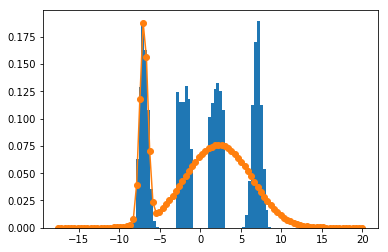

In [34]:
test_data = (np.linspace(-20,20, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), mdl(test_data).flatten(), 'o-')

## Via grad descent

In [24]:
mdl = Model()
mdl.add(ThetaUnitLayer(1,2,1, init_max_param_bound=20, diagonal_T=True, check_positivity=True))
mdl.add(NormAddLayer(2,1))

Progress: |████████████████████| 100.0% | iteration 1000 in 257.21(s) | cost = 15880.084901 | val = 0.000000


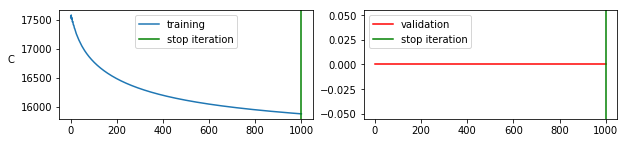

In [27]:
minim = minimizer.SGD()
solution = minim.train(logarithmic(), mdl, data, scheme=adam(), lr=0.001, maxiter=1000)

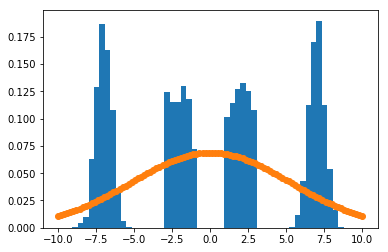

In [29]:
test_data = (np.linspace(-10,10, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), mdl(test_data).flatten(), 'o-')

In [31]:
np.exp(mdl.get_layer(2)._w)

array([[2.98142719, 0.33540983]])

In [ ]:
#print(mdl.get_layer(2)._w)

print("Bv:",mdl.get_layer(1).get_unit(1)._bv)
print("Bh:",mdl.get_layer(1).get_unit(1)._bh)
print("W:",mdl.get_layer(1).get_unit(1)._w)
print("T:",mdl.get_layer(1).get_unit(1)._t)
print("Q:",mdl.get_layer(1).get_unit(1)._q)
mdl.get_parameters()

In [ ]:
mdl.gradient_check(0,test_data,0.000001)